In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import json
%matplotlib inline

In [2]:
df = pd.read_csv("../output/2022-full-player-data.csv")

In [3]:
names_and_links = pd.read_csv("../output/2022-wikipedia-to-transfermarkt.csv")

In [4]:
df = df.merge(names_and_links, left_on='player_id', right_on='transfermarkt_id')

In [5]:
df['age_first_left'] = df.age_first_left.round()

In [6]:
caf_teams = ['Ghana', 'Senegal', 'Morocco', 'Cameroon', "Tunisia"]
conmebol_teams = ['Brazil', 'Argentina', 'Uruguay', 'Ecuador']
concacaf_teams = ['United States', 'Mexico', 'Canada', 'Costa Rica']
afc_teams = ['Australia', 'Iran', 'Japan', 'Qatar', 'Saudi Arabia', 'Korea, South']
uefa_teams = [ 'Belgium', 'Croatia', 'Denmark', 'England', 'France', 'Germany',
              'Netherlands', 'Poland', 'Portugal', 'Serbia', 'Spain', 'Switzerland',
              'Wales']

In [7]:
selected_countries = [
    "England", "Germany", "Spain", #"France",
    "Brazil", "Argentina", "Ecuador", "Uruguay",
    "Cameroon", "Morocco", "Senegal", "Ghana", #"Tunisia"
]

In [8]:
all_countries = df.citizenship.unique().tolist()

In [11]:
ghana = df[df.citizenship=='Ghana']
ghana['country_of_birth'] = ghana.place_of_birth.apply(lambda x: x.split(",")[1].strip())

<ipython-input-11-8653307d2c0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ghana['country_of_birth'] = ghana.place_of_birth.apply(lambda x: x.split(",")[1].strip())


In [12]:
senegal = df[df.citizenship=='Senegal']
diambas = []
gf = []

for player_id in senegal.player_id.unique():
    
    with open(f"../output/players/transfer-info-{player_id}.json", "r") as f:
        data = json.load(f)
        
    teams = pd.DataFrame(data)
    
    if '30031' in teams.left_club_id.unique().tolist():
        print('Generation Foot', player_id)
        gf.append(player_id)
        
    if '28578' in teams.left_club_id.unique().tolist():
        print('Diambas', player_id)
        diambas.append(player_id)

Diambas 126665
Generation Foot 568693
Diambas 525578
Diambas 822458
Generation Foot 200512
Generation Foot 410225


In [13]:
for player_id in senegal[~senegal.started_abroad].player_id.unique():
    
    with open(f"../output/players/transfer-info-{player_id}.json", "r") as f:
        data = json.load(f)
        
    teams = pd.DataFrame(data)
    teams.date = pd.to_datetime(teams.date)
    teams = teams.sort_values(by='date').reset_index()
    
        
    with open(f"../output/players/basic-info-{player_id}.json", "r") as f:
        data = json.load(f)
        

    first_transfer = teams.loc[0]
    print(data['fetched_name'], player_id, '–', first_transfer.left, first_transfer.left_club_id)
    

Pape Abou Cissé 364234 – AS Pikine 34895
Idrissa Gueye 126665 – Diambars FC 28578
Pape Matar Sarr 568693 – Génération Foot 30031
Pathé Ciss 525578 – Diambars FC 28578
Bamba Dieng 822458 – Diambars FC 28578
Sadio Mané 200512 – Génération Foot 30031
Cheikhou Kouyaté 66934 – ASC Yeggo 25903
Formose Mendy 649023 – AF Darou Salam 72315
Krépin Diatta 490426 – Oslo FA Dakar 63376
Ismaïla Sarr 410225 – Génération Foot 30031
Moustapha Name 586262 – AS Douanes 3165
Nicolas Jackson 776890 – Casa Sports 22419
Mamadou Loum 364237 – US Ouakam 28577


In [14]:
senegal[~senegal.started_abroad][['fetched_name', 'player_id', 'age_first_left']]

,fetched_name,player_id,age_first_left
6,Pape Abou Cissé,364234,19.0
7,Idrissa Gueye,126665,19.0
86,Pape Matar Sarr,568693,18.0
110,Pathé Ciss,525578,23.0
125,Bamba Dieng,822458,21.0
301,Sadio Mané,200512,19.0
405,Cheikhou Kouyaté,66934,17.0
423,Formose Mendy,649023,19.0
519,Krépin Diatta,490426,18.0
567,Ismaïla Sarr,410225,18.0


In [15]:
ghana[ghana.country_of_birth != 'Ghana'][['transfermarkt_name', 'player_id', 'place_of_birth']]

,transfermarkt_name,player_id,place_of_birth
48,Italian Wikipedia,250844,"Montpellier, France"
295,Iñaki Williams,255508,"Bilbao, Spain"
329,not on wikidata,583255,"London, England"
393,Elisha Owusu,395695,"Montreuil, France"
431,Tariq Lamptey,504148,"London, England"
606,Jordan Ayew,108354,"Marseille, France"
736,André Ayew,45403,"Seclin, France"
788,Denis Odoi,59641,"Leuven, Belgium"


In [16]:
df.groupby('citizenship').age_first_left.mean().sort_values()

citizenship
Qatar            16.800000
Ghana            18.363636
Wales            18.555556
Cameroon         18.900000
Canada           19.230769
Senegal          19.307692
Belgium          19.458333
Serbia           19.600000
United States    19.750000
England          20.000000
Saudi Arabia     20.000000
Brazil           20.160000
Korea, South     20.222222
Poland           20.260870
Croatia          20.333333
Costa Rica       20.388889
Uruguay          20.400000
Germany          20.500000
Australia        20.526316
France           20.541667
Denmark          20.560000
Spain            20.636364
Portugal         20.809524
Argentina        20.923077
Ecuador          20.956522
Switzerland      21.181818
Japan            21.954545
Netherlands      22.052632
Mexico           22.428571
Morocco          22.800000
Iran             23.190476
Tunisia          24.307692
Name: age_first_left, dtype: float64

In [17]:
df[df.citizenship=='Senegal'].has_played_home_over_16.value_counts()

True     14
False    12
Name: has_played_home_over_16, dtype: int64

In [18]:
sa_df = df[df.citizenship.isin(conmebol_teams)]

In [19]:
sa_df.age_first_left.round().value_counts()

20.0    20
21.0    17
18.0    17
19.0    13
22.0    11
24.0     7
23.0     4
25.0     3
26.0     3
13.0     1
16.0     1
29.0     1
17.0     1
Name: age_first_left, dtype: int64

In [20]:
sa_df.has_played_home_over_16.value_counts()

True     101
False      3
Name: has_played_home_over_16, dtype: int64

In [21]:
sa_df[~sa_df.has_played_home_over_16]

,name_in_home_country,date_of_birth,place_of_birth,age,height,citizenship,position,foot,current_club,current_club_url,...,started_abroad,no_transfers,days_abroad,days_home,currently_abroad,total_days,has_played_home_over_16,wikipedia_page,transfermarkt_id,transfermarkt_name
38,Lionel Andrés Messi Cuccitini,1987-06-24,"Rosario, Argentina",35,"1,70 m",Argentina,Attack - Second Striker,left,Paris Saint-Germain,/paris-saint-germain/startseite/verein/583,...,False,False,8177,0,True,8177,False,https://en.wikipedia.org/wiki/Lionel_Messi,28003,Lionel Messi
61,Rodrigo Bentancur Colmán,1997-06-25,"Nueva Helvecia, Uruguay",25,"1,87 m",Uruguay,midfield - Central Midfield,right,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,...,True,True,3435,0,True,3435,False,https://en.wikipedia.org/wiki/Rodrigo_Bentancur,354362,Rodrigo Bentancur
434,Jeremy Leonel Sarmiento Morante,2002-06-16,"Madrid, Spain",20,"1,83 m",Ecuador,midfield - Attacking Midfield,right,Brighton & Hove Albion,/brighton-amp-hove-albion/startseite/verein/1237,...,True,True,1618,0,True,1618,False,https://en.wikipedia.org/wiki/Jeremy_Sarmiento,568005,not on wikidata


In [22]:
sa_df[sa_df.started_abroad]

,name_in_home_country,date_of_birth,place_of_birth,age,height,citizenship,position,foot,current_club,current_club_url,...,started_abroad,no_transfers,days_abroad,days_home,currently_abroad,total_days,has_played_home_over_16,wikipedia_page,transfermarkt_id,transfermarkt_name
61,Rodrigo Bentancur Colmán,1997-06-25,"Nueva Helvecia, Uruguay",25,"1,87 m",Uruguay,midfield - Central Midfield,right,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,...,True,True,3435,0,True,3435,False,https://en.wikipedia.org/wiki/Rodrigo_Bentancur,354362,Rodrigo Bentancur
398,Hernán Ismael Galíndez,1987-03-30,"Rosario, Argentina",35,"1,88 m",Ecuador,Goalkeeper,right,SD Aucas,/sd-aucas/startseite/verein/6362,...,True,True,3449,3726,False,7175,True,https://en.wikipedia.org/wiki/Hern%C3%A1n_Gal%...,77127,not on wikidata
434,Jeremy Leonel Sarmiento Morante,2002-06-16,"Madrid, Spain",20,"1,83 m",Ecuador,midfield - Attacking Midfield,right,Brighton & Hove Albion,/brighton-amp-hove-albion/startseite/verein/1237,...,True,True,1618,0,True,1618,False,https://en.wikipedia.org/wiki/Jeremy_Sarmiento,568005,not on wikidata


#### Players per share of career spent abroad

In [23]:
df['share_days_abroad'] = df.days_abroad / df.total_days
df['share_days_home'] = df.days_home / df.total_days

In [24]:
df_ = df[df.citizenship.isin(selected_countries)]

In [25]:
order = df_.groupby('citizenship').share_days_home.mean().sort_values().index

In [26]:
order

Index(['Cameroon', 'Senegal', 'Ghana', 'Morocco', 'Uruguay', 'Brazil',
       'Argentina', 'Ecuador', 'Spain', 'Germany', 'England'],
      dtype='object', name='citizenship')

<AxesSubplot:xlabel='share_days_home', ylabel='citizenship'>

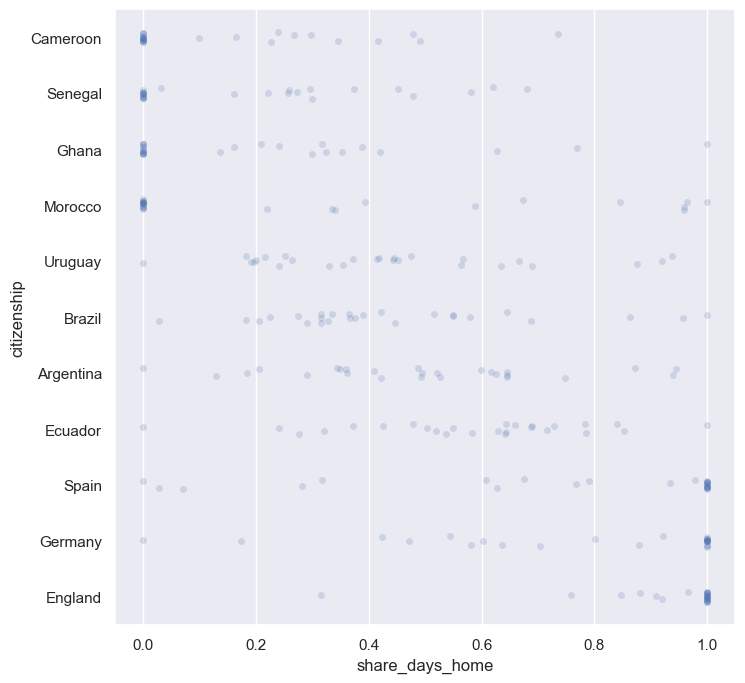

In [27]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.stripplot(data=df_, y='citizenship', x='share_days_home', alpha=.2, order=order, jitter=True)

In [28]:
def joyplot(data, x, row, hue, countries, suptitle=None, fname=None):
    
    df_ = data[data.citizenship.isin(countries)]
    order = df_.groupby(row)[x].mean().sort_values().index
    
    
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    palette = ['#2a8fc6']
#   palette = sns.color_palette("Set2", 12)
    g = sns.FacetGrid(df_, palette=palette, row=row, hue=hue, aspect=5, height=.8, row_order=order)


    g.map_dataframe(sns.kdeplot, x=x, fill=True, alpha=1, bw_adjust=.5)
    g.map_dataframe(sns.kdeplot, x=x, color='black', bw_adjust=.5)

    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, -.2, label, color='black', fontsize=13,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, row)

    g.fig.subplots_adjust(hspace=-.2)

    g.set_titles("")
    g.set(yticks=[], xticks=[], ylabel="", xlabel='')
    g.despine(left=True)

    g.set(xlim=(0, 1))

    plt.suptitle(suptitle, y=0.98)
    
    if fname:
        plt.savefig(f"../viz/{fname}.svg")
    #plt.suptitle("In African squads, most players spent their whole careers abroad", y=0.98)

In [29]:
#joyplot(df, x='share_days_home', row='citizenship', hue='citizenship', countries=all_countries)

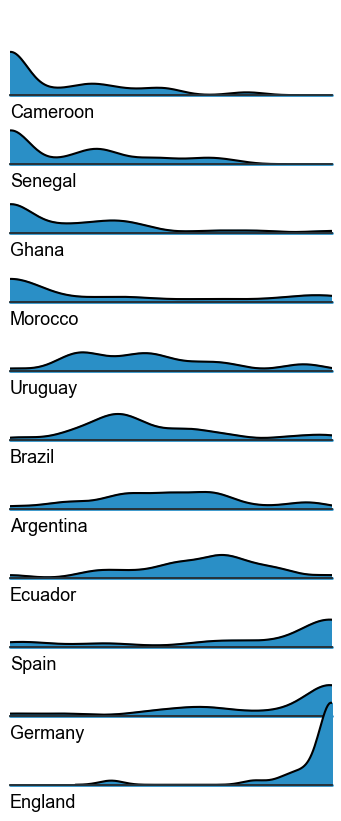

In [30]:
joyplot(df, x='share_days_home', row='citizenship', hue='citizenship', countries=selected_countries, fname='joyplot-selected')

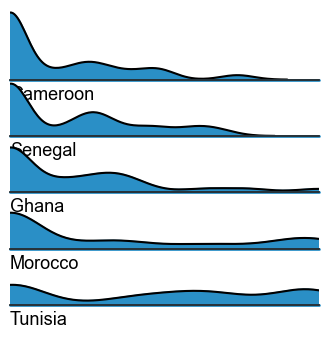

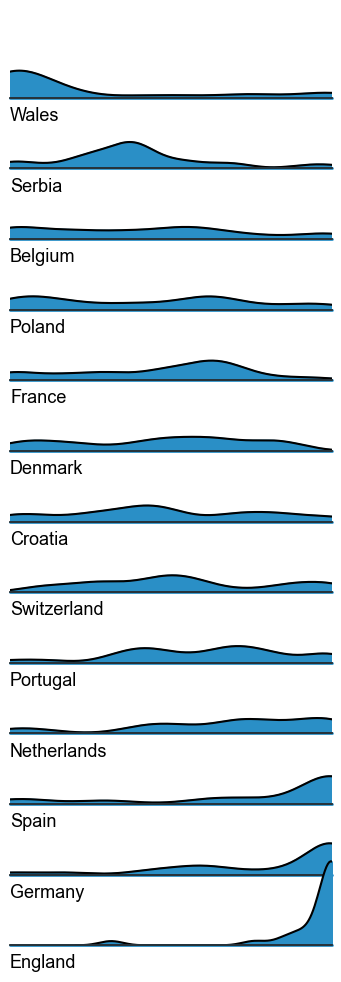

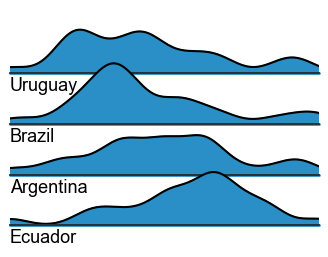

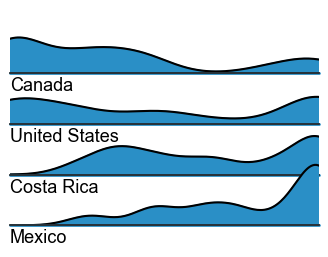

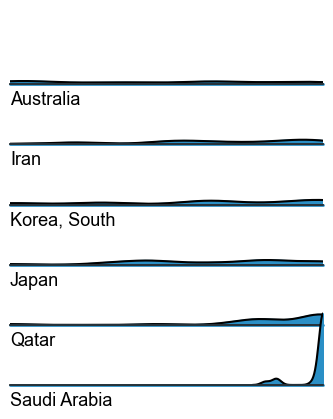

In [31]:
# Notice that scales now differ among nation groups
for countries in [caf_teams, uefa_teams, conmebol_teams, concacaf_teams, afc_teams]:
    joyplot(df, x='share_days_home', row='citizenship', hue='citizenship', countries=countries)
    

In [32]:
def stripplot(data, x, row, hue, countries, suptitle=None):
    
    df_ = data[data.citizenship.isin(countries)]
    order = df_.groupby(row)[x].mean().sort_values().index
    
    
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    palette = sns.color_palette("Set2", 12)
    g = sns.FacetGrid(df_, palette=palette, row=row, hue=hue, aspect=5, height=.9, row_order=order)

    g.map_dataframe(sns.stripplot, x=x, jitter=True, alpha=.3, size=9)

    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, -.1, label, color='black', fontsize=13,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, row)

    g.set_titles("")
    g.set(yticks=[], xticks=[], ylabel="", xlabel='')
    g.despine(left=True, bottom=True)

    plt.suptitle(suptitle, y=0.98)

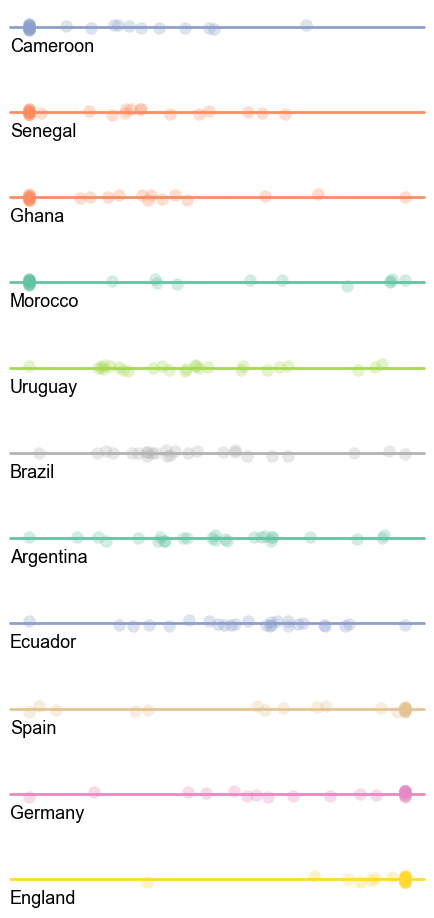

In [33]:
stripplot(df, x='share_days_home', row='citizenship', hue='citizenship', countries=selected_countries)

#### Of the players that already played abroad, at which age they left?

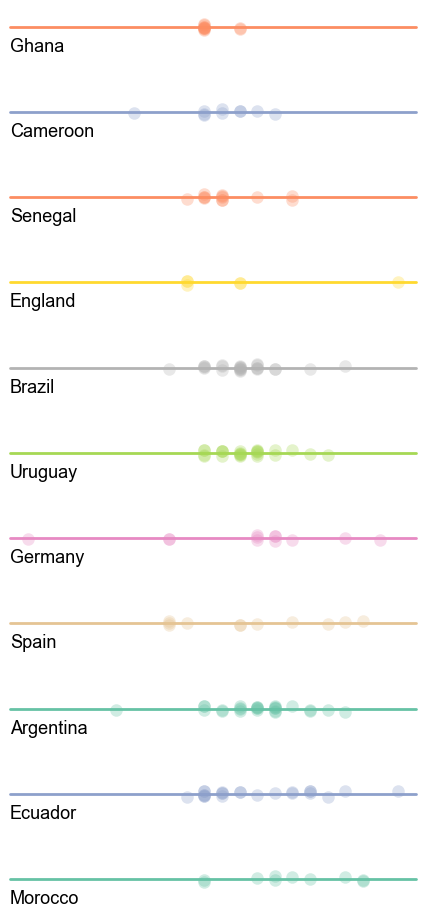

In [34]:
stripplot(df, x='age_first_left', row='citizenship', hue='citizenship', countries=selected_countries)

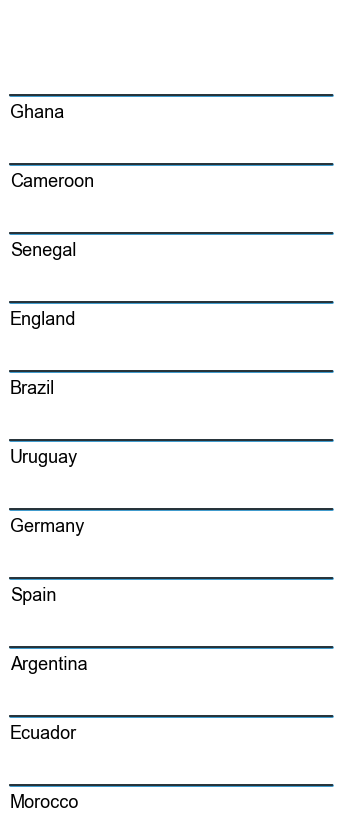

In [35]:
joyplot(df, x='age_first_left', row='citizenship', hue='citizenship', countries=selected_countries)